<a href="https://colab.research.google.com/github/megancoll/megan_INFO5731_-Spring2022/blob/main/In_class_exercise/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [5]:
#uploading and reading data

In [6]:
import nltk 
from nltk.util import ngrams
from nltk.util import bigrams
from collections import Counter, defaultdict
import pandas as pd
from nltk.tokenize import word_tokenize
import spacy
import numpy as np

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df = pd.read_csv("/content/a2clean_file.csv")

In [9]:
#Part 1 N Grams (n=3)
sents = df["Clean Tweet"].values
sent = list(sents)
sents = [word_tokenize(s) for s in sent]

all_words = []

for sent in sents:
  all_words += sent


n_grams = list(ngrams(all_words, n=3))

n_grams_counter = Counter(n_grams)

print(list(n_grams_counter.items())[:10])

[(('start', 'shopify', 'store'), 1), (('shopify', 'store', 'run'), 1), (('store', 'run', 'successfully'), 1), (('run', 'successfully', 'shopify'), 1), (('successfully', 'shopify', 'starting'), 1), (('shopify', 'starting', 'guide'), 1), (('starting', 'guide', 'kwasikwarteng'), 1), (('guide', 'kwasikwarteng', 'liztruss'), 1), (('kwasikwarteng', 'liztruss', 'africanledenergy'), 1), (('liztruss', 'africanledenergy', 'bye'), 1)]


In [10]:
#part 2 probabilities of bigrams (count(w1, w2) / count(w2))
bigrams_list = list(bigrams(all_words))

word_counter = Counter(all_words)
bigram_counter = Counter(bigrams_list)

print(bigrams_list[:10])

bigram_prob_dict = {}

for bg in bigrams_list:
  w1 = bg[0]
  w2 = bg[1]
  bg_count = bigram_counter[bg]
  w2_count = word_counter[w2]
  bigram_prob = bg_count / w2_count
  bigram_prob_dict[bg] = bigram_prob

[('start', 'shopify'), ('shopify', 'store'), ('store', 'run'), ('run', 'successfully'), ('successfully', 'shopify'), ('shopify', 'starting'), ('starting', 'guide'), ('guide', 'kwasikwarteng'), ('kwasikwarteng', 'liztruss'), ('liztruss', 'africanledenergy')]


In [11]:
bigram_prob_dict

{('start', 'shopify'): 0.5,
 ('shopify', 'store'): 0.2,
 ('store', 'run'): 0.06666666666666667,
 ('run', 'successfully'): 1.0,
 ('successfully', 'shopify'): 0.5,
 ('shopify', 'starting'): 0.125,
 ('starting', 'guide'): 1.0,
 ('guide', 'kwasikwarteng'): 1.0,
 ('kwasikwarteng', 'liztruss'): 1.0,
 ('liztruss', 'africanledenergy'): 1.0,
 ('africanledenergy', 'bye'): 0.5,
 ('bye', 'sneakdeepsecret'): 1.0,
 ('sneakdeepsecret', 'ww'): 1.0,
 ('ww', 'blacklivesmatter'): 0.0001266784899923993,
 ('blacklivesmatter', 'invalidecho'): 1.0,
 ('invalidecho', 'listen'): 0.037037037037037035,
 ('listen', 'fuck'): 0.030303030303030304,
 ('fuck', 'twitter'): 0.00847457627118644,
 ('twitter', 'bc'): 0.05263157894736842,
 ('bc', 'evilon'): 1.0,
 ('evilon', 'owning'): 1.0,
 ('owning', 'vocal'): 0.2,
 ('vocal', 'hope'): 0.02127659574468085,
 ('hope', 'peace'): 0.0033444816053511705,
 ('peace', 'justice'): 0.0037313432835820895,
 ('justice', 'victim'): 0.07692307692307693,
 ('victim', 'big'): 0.05,
 ('big', 'o

In [12]:
#part 3 frequency of noun phrases

model_nlp = spacy.load("en_core_web_sm")
sents = df["Clean Tweet"].values
sent = list(sents)

max_np_counts = defaultdict(int)

all_sent_counts = {}

for sent in sents:
  sent_counts = defaultdict(int)
  doc = model_nlp(sent)
  for token in doc:
    if token.pos_ == "NOUN":
      t = str(token.text)
      sent_counts[t] += 1
      if max_np_counts[t] < sent_counts[t]:
        max_np_counts[t] = sent_counts[t]
  all_sent_counts[sent] = sent_counts



In [13]:
all_np = list(max_np_counts.keys())
cols = ["tweet"]
cols += all_np
np_df = pd.DataFrame(columns = cols )

In [14]:
for sent in sents[:100]:
  row = [sent]
  s_counts = all_sent_counts[sent]
  for word in max_np_counts.keys():
    if word in s_counts:
      count = s_counts[word]
      max = max_np_counts[word]
      freq = count / max
      row.append(freq)
    else:
      row.append(0)
  
  np_df.loc[len(np_df)] = row
    

In [15]:
#Noun phrase df with relative frequencies of all Noun Phrases
np_df

,tweet,store,run,guide,invalidecho,fuck,twitter,evilon,reality,check,...,pickings,sherbornpolice,fuhrer,gesagt,mines,tanzania,maurice,seats,antiracismday,goodvibes
0,start shopify store run successfully shopify s...,1.0,1.0,1.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,listen fuck twitter bc evilon owning vocal hop...,0.0,0.0,0.0,0.0,0.25,0.5,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,think gone let come back tell story mainstream...,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,blacklivesmatter,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,google discriminate porn supporting blacklives...,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,us accounts worlds privately owned guns restor...,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,signing evening wishing peaceful nights sleep ...,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,want night positive please someone could share...,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,breakingbrown black men matter biggest movemen...,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [16]:
#creating term document matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Count Vectorizer
vectorizer = TfidfVectorizer() 
vects = vectorizer.fit_transform(df["Clean Tweet"].values)



#display matrix for first 5 documents (tweets)
td = pd.DataFrame(vects.todense()).iloc[:5]  
td.columns = vectorizer.get_feature_names()
term_document_matrix = td.T
term_document_matrix.columns = ['Doc '+str(i) for i in range(1, 6)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

# Top 25 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

#printing out sample of the term document matrix
print(term_document_matrix.drop(columns=['total_count']).head(25))






                         Doc 1     Doc 2     Doc 3  Doc 4     Doc 5
blacklivesmatter      0.027968  0.032193  0.051103    1.0  0.073127
porn                  0.000000  0.000000  0.000000    0.0  0.564290
discriminate          0.000000  0.000000  0.000000    0.0  0.555895
shopify               0.507225  0.000000  0.000000    0.0  0.000000
supporting            0.000000  0.000000  0.000000    0.0  0.472489
mainstream            0.000000  0.000000  0.417755    0.0  0.000000
google                0.000000  0.000000  0.000000    0.0  0.379427
gone                  0.000000  0.000000  0.356793    0.0  0.000000
talking               0.000000  0.000000  0.328499    0.0  0.000000
tell                  0.000000  0.000000  0.316724    0.0  0.000000
come                  0.000000  0.000000  0.299219    0.0  0.000000
story                 0.000000  0.000000  0.292337    0.0  0.000000
evilon                0.000000  0.291925  0.000000    0.0  0.000000
ol                    0.000000  0.291925  0.0000

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:

import math

# Define a cosine similarity function
def cosine_similarity(a,b):
    "compute cosine similarity of v1 to v2: (a dot b)/{||a||*||b||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(a)):
        x = a[i]; y = b[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)




In [18]:
#cosine similarity
print("Original Tweet: ", df.loc[0, "Clean Tweet"])

test1_tweet = "I want to start a shopify store and run it successfully"
print("Test 1 example: ", test1_tweet)

test2_tweet = "Dogs are great pets to start to run races with"
print("Test 2 example: ", test2_tweet)

test1_vect = vectorizer.transform([test1_tweet])
test2_vect = vectorizer.transform([test2_tweet])

test1_vect = test1_vect.todense()
test2_vect = test2_vect.todense()



test1_vect = np.transpose(test1_vect)
test2_vect = np.transpose(test2_vect)





tweet1_vect = vectorizer.transform(df["Clean Tweet"].values)[0]
tweet1_vect = tweet1_vect.todense()
tweet1_vect = np.transpose(tweet1_vect)


print("Test 1", cosine_similarity(test1_vect, tweet1_vect))

print("Test 2", cosine_similarity(test2_vect, tweet1_vect))


Original Tweet:  start shopify store run successfully shopify starting guide kwasikwarteng liztruss africanledenergy bye sneakdeepsecret ww blacklivesmatter invalidecho
Test 1 example:  I want to start a shopify store and run it successfully
Test 2 example:  Dogs are great pets to start to run races with
Test 1 [[0.60653799]]
Test 2 [[0.14732326]]


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [19]:
# training word2vec model
import gensim


from gensim.models import Word2Vec
# define training data


sents = df["Clean Tweet"].values
sent = list(sents)
sents = [word_tokenize(s) for s in sent]

# train model
model = Word2Vec(sents, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)




Word2Vec(vocab=21315, size=100, alpha=0.025)
['start', 'shopify', 'store', 'run', 'successfully', 'starting', 'guide', 'kwasikwarteng', 'liztruss', 'africanledenergy', 'bye', 'sneakdeepsecret', 'ww', 'blacklivesmatter', 'invalidecho', 'listen', 'fuck', 'twitter', 'bc', 'evilon', 'owning', 'vocal', 'hope', 'peace', 'justice', 'victim', 'big', 'ol', "'", 'reality', 'check', 'miss', 'girl', 'universityofkentucky', 'dobetter', 'think', 'gone', 'let', 'come', 'back', 'tell', 'story', 'mainstream', 'media', "'s", 'talking', 'blm', 'google', 'discriminate', 'porn', 'supporting', 'fact', 'human', 'panics', 'us', 'grotesque', 'playacting', 'imaginable', 'deal', 'absurdities', 'keep', 'life', 'total', 'waste', 'hal', 'bennett', 'mondaythoughts', 'mondaymotivation', 'writingcommunity', 'amwritingfiction', 'writersoftwitter', 'ding', 'pennstate', 'justiceforall', 'iamtarafelicia', 'breakingtrends', 'dillards', 'glad', 'read', 'get', "'em", 'mama', 'bear', 'truth', 'hurts', 'whiteprivilege', 'jewis

<ipython-input-19-8de5c4d9c573>:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['sentence'])


Word2Vec(vocab=21315, size=100, alpha=0.025)


<ipython-input-20-8cf79b69a83b>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


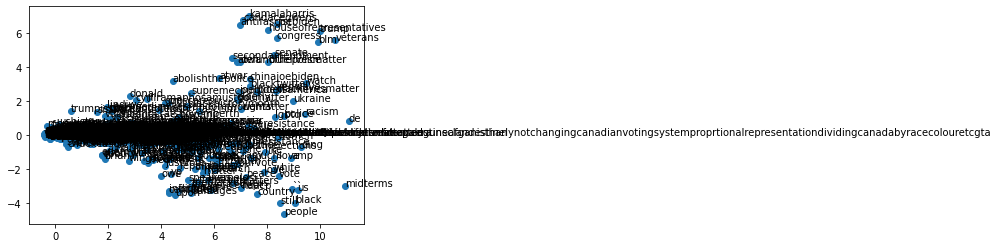

In [20]:
#visualizing word2vec embeddings
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# train model
model = Word2Vec(sents, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
 pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

its hard to read that graph, but you can see some clusters: senate, congress, trump, and kamala harris are all grouped in the top right. Similarly, racism and blacklivesmatter are grouped together in the middle right, which shows they often occur in similar domains. 

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [24]:
# The GitHub link of your final csv file

selected_df = df[:100]

sentiment = [0] * 100

selected_df["sentiment"] = sentiment

for i in selected_df.index:
  print(selected_df.loc[i, "Clean Tweet"])
  senti = input()
  selected_df.loc[i, "sentiment"] = senti


#1 is positive 0 is negative
100


<ipython-input-24-5031f1af14bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df["sentiment"] = sentiment


start shopify store run successfully shopify starting guide kwasikwarteng liztruss africanledenergy bye sneakdeepsecret ww blacklivesmatter invalidecho
1
listen fuck twitter bc evilon owning vocal hope peace justice victim big ol ' reality check miss girl blacklivesmatter universityofkentucky dobetter
0
think gone let come back tell story mainstream media 's talking blacklivesmatter blm
0
blacklivesmatter
1
google discriminate porn supporting blacklivesmatter
0
fact human panics us grotesque playacting imaginable deal absurdities keep life total waste hal bennett mondaythoughts mondaymotivation writingcommunity amwritingfiction writersoftwitter blacklivesmatter
0
ding ding ding ding ding ding ding ding ding ding ding ding pennstate blacklivesmatter justiceforall
1
iamtarafelicia breakingtrends dillards glad read get 'em mama bear blacklivesmatter
1
truth hurts whiteprivilege jewishprivilege america blacklivesmatter
0
defund hawleypolice blacklivesmatter
0
got ta agree madam lizcheney g

In [25]:
selected_df.to_csv("/content/annotated_df.csv")